In [1]:
from functions import *
from albumentations import (
    HorizontalFlip, VerticalFlip, 
    ShiftScaleRotate, OpticalDistortion, GridDistortion, ElasticTransform, 
    RandomBrightnessContrast, 
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

# in order to get reproducable results
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(1)
random.seed(1)

import cmapy
from pytorchtools import EarlyStopping
os.environ["CUDA_VISIBLE_DEVICES"] = "3"  # Only GPU 3 is visible to this code
time1 = time.time()

In [2]:
exampleNo = 233
data_path = "/data/anyu/thebeData"
seismic_path = '{}/train/seismic/{}.npy'.format(data_path,exampleNo)
label_path = '{}/train/annotation/{}.npy'.format(data_path,exampleNo)
t_start = time.time()
seismic = np.load(seismic_path)
fault = np.load(label_path)
print(seismic.shape,fault.shape)
print("load in {} sec".format(time.time()-t_start))

seismic = np.asarray(seismic, dtype=np.float32)
fault = np.asarray(fault, dtype=np.float32)
print(seismic.dtype)

(96, 96) (96, 96)
load in 0.0028734207153320312 sec
float32


In [3]:
seislist = []
faultlist = []
names = []

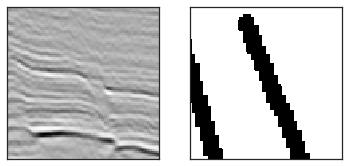

In [4]:
seislist.append(seismic)
faultlist.append(fault)
names.append("original")
fig = plt.figure(frameon=True)
plt.rcParams.update({'font.size': 1})
ax = plt.subplot(1,2,1)
ax.imshow(seismic)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(fault)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_ori.eps",bbox_inches="tight")

# plt.figure()
# plt.axis('off')
# plt.imshow(seismic)
# plt.figure()
# plt.axis('off')
# plt.imshow(fault)

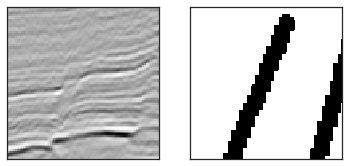

In [5]:
aug = HorizontalFlip(p=1)
augmented = aug(image=seismic, mask=fault)
aug_x, aug_y = augmented['image'], augmented['mask']

seislist.append(aug_x)
faultlist.append(aug_y)
names.append("Horizontal\nFlip")

fig = plt.figure(frameon=True)
ax = plt.subplot(1,2,1)
ax.imshow(aug_x)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(aug_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_hf.eps",bbox_inches="tight")

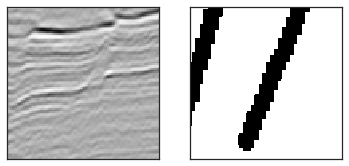

In [6]:
aug = VerticalFlip(p=1)
augmented = aug(image=seismic, mask=fault)
aug_x, aug_y = augmented['image'], augmented['mask']

seislist.append(aug_x)
faultlist.append(aug_y)
names.append("Vertical\nFlip")


fig = plt.figure(frameon=True)
ax = plt.subplot(1,2,1)
ax.imshow(aug_x)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(aug_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_vf.eps",bbox_inches="tight")

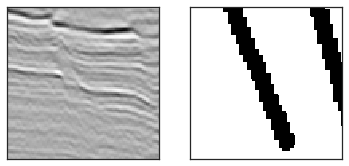

In [7]:
aug = Compose([VerticalFlip(p=1), HorizontalFlip(p=1)])
augmented = aug(image=seismic, mask=fault)
aug_x, aug_y = augmented['image'], augmented['mask']

seislist.append(aug_x)
faultlist.append(aug_y)
names.append("Horizontal\n&VerticalFlip")

fig = plt.figure(frameon=True)
ax = plt.subplot(1,2,1)
ax.imshow(aug_x)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(aug_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_h_vf.eps",bbox_inches="tight")

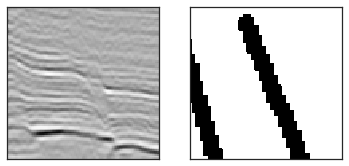

In [8]:
aug = IAAEmboss(p=1)
augmented = aug(image=seismic, mask=fault)
aug_x, aug_y = augmented['image'], augmented['mask']

seislist.append(aug_x)
faultlist.append(aug_y)
names.append("IAAEmboss")

fig = plt.figure(frameon=True)
ax = plt.subplot(1,2,1)
ax.imshow(aug_x)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(aug_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_IAAEmboss.eps",bbox_inches="tight")

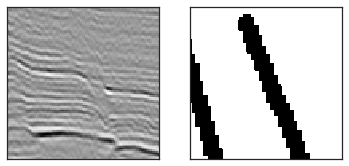

In [9]:
aug = IAASharpen(p=1)
augmented = aug(image=seismic, mask=fault)
aug_x, aug_y = augmented['image'], augmented['mask']

seislist.append(aug_x)
faultlist.append(aug_y)
names.append("IAASharpen")

fig = plt.figure(frameon=True)
ax = plt.subplot(1,2,1)
ax.imshow(aug_x)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(aug_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_sharpen.eps",bbox_inches="tight")

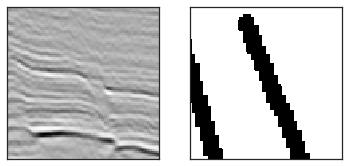

In [10]:
aug = RandomBrightnessContrast(p=1)
augmented = aug(image=seismic, mask=fault)
aug_x, aug_y = augmented['image'], augmented['mask']

seislist.append(aug_x)
faultlist.append(aug_y)
names.append("Random\nBrightness")

fig = plt.figure(frameon=True)
ax = plt.subplot(1,2,1)
ax.imshow(aug_x)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(aug_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_RandomBrightnessContrast.eps",bbox_inches="tight")

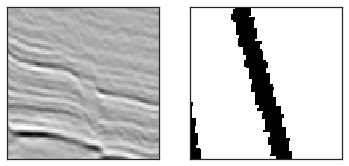

In [11]:
aug = ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=1)
augmented = aug(image=seismic, mask=fault)
aug_x, aug_y = augmented['image'], augmented['mask']

seislist.append(aug_x)
faultlist.append(aug_y)
names.append("Shift\nScaleRotate")

fig = plt.figure(frameon=True)
ax = plt.subplot(1,2,1)
ax.imshow(aug_x)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(aug_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_shiftscalerotate.eps",bbox_inches="tight")

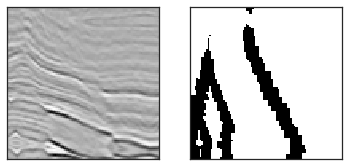

In [12]:
aug = ElasticTransform(p=1, alpha=400, sigma=400 * 0.05, alpha_affine=400 * 0.03)
augmented = aug(image=seismic, mask=fault)
aug_x, aug_y = augmented['image'], augmented['mask']

seislist.append(aug_x)
faultlist.append(aug_y)
names.append("Elastic\nTransform")

fig = plt.figure(frameon=True)
ax = plt.subplot(1,2,1)
ax.imshow(aug_x)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(aug_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_elastic.eps",bbox_inches="tight")

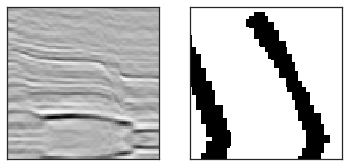

In [13]:
aug = GridDistortion(p=1)
augmented = aug(image=seismic, mask=fault)
aug_x, aug_y = augmented['image'], augmented['mask']

seislist.append(aug_x)
faultlist.append(aug_y)
names.append("Grid\nDistortion")

fig = plt.figure(frameon=True)
ax = plt.subplot(1,2,1)
ax.imshow(aug_x)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(aug_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_grid.eps",bbox_inches="tight")

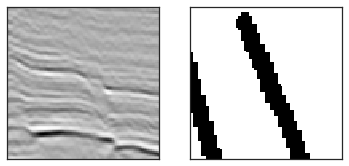

In [14]:
aug = OpticalDistortion(p=1)
augmented = aug(image=seismic, mask=fault)
aug_x, aug_y = augmented['image'], augmented['mask']

seislist.append(aug_x)
faultlist.append(aug_y)
names.append("Optical\nDistortion")

fig = plt.figure(frameon=True)
ax = plt.subplot(1,2,1)
ax.imshow(aug_x)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(a) None')
ax = plt.subplot(1,2,2)
ax.imshow(aug_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
# ax.title.set_text('(b) Average')
plt.savefig("aug_optical.eps",bbox_inches="tight")

In [15]:
print(len(seislist))

11


In [16]:
print(names)

['original\n', 'Horizontal\nFlip', 'Vertical\nFlip', 'Horizontal\n&VerticalFlip', 'IAAEmboss', 'IAASharpen', 'Random\nBrightness', 'Shift\nScaleRotate', 'Elastic\nTransform', 'Grid\nDistortion', 'Optical\nDistortion']


In [22]:
names[0] = "Original"

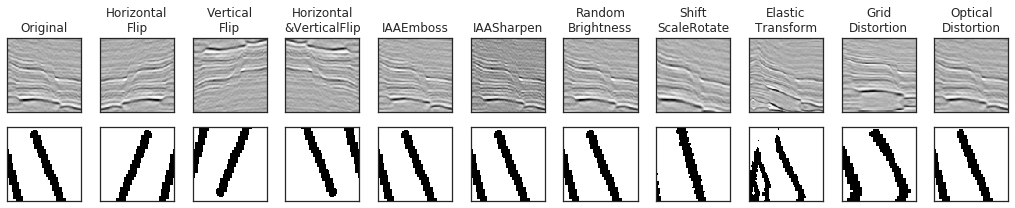

In [23]:
fig = plt.figure(figsize=(18,3),frameon=True)
plt.rcParams.update({'font.size': 10})
for i in range(22):
    ax = plt.subplot(2,11,i+1)
    if i <11:
        ax.imshow(seislist[i])
        ax.title.set_text(names[i])
    else:
        ax.imshow(faultlist[i-11])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
#     print(int(i/11),i%11)
plt.savefig("augexamples_large.eps",bbox_inches="tight")

In [18]:
print("Optical\nDistortion")

Optical
Distortion
